In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

import matplotlib.pyplot as plt



In [2]:
dataset=pd.read_csv('../../data/BO1_forcast_customer_demand/forecast_customer_demand.csv')


In [3]:
station_service=pd.read_excel('../../data/data reference/codification clients_NUMCPT.xlsx',header=1)
station_service


,SERVICE,NUMCPT,STATION,GOUVERNORAT,Unnamed: 4
0,RESEAU,150720,ARIANA,ARIANA,
1,RESEAU,152510,MNIHLA,ARIANA,
2,RESEAU,153360,Rte de RAOUED,ARIANA,
3,RESEAU,153650,C.B.Ammar,ARIANA,
4,RESEAU,153990,ENNASR ARIANA,ARIANA,
...,...,...,...,...,...
255,RESEAU,153680,EL FAHS,ZAGHOUAN,NaN
256,RESEAU,153690,BIR MCHERGA,ZAGHOUAN,NaN
257,RESEAU,153780,H.ZRIBA,ZAGHOUAN,NaN
258,RESEAU,154360,ENNADHOUR,ZAGHOUAN,NaN


# 1-Data Understanding

## 1.1 Data info

In [4]:
#dataset = dataset.drop(dataset.columns[0], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21775 entries, 0 to 21774
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOMDPO       21775 non-null  object 
 1   LIBPRD       21775 non-null  object 
 2   NUMCPT       21775 non-null  object 
 3   MOIS         21775 non-null  object 
 4   CODGVR       21775 non-null  object 
 5   CODLOC       21775 non-null  object 
 6   SUM(MNTHT)   21775 non-null  float64
 7   prixHT       21764 non-null  object 
 8   SUM(QTEPRD)  21775 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.5+ MB


In [5]:
dataset = dataset.assign(
    prixHT=lambda x: x.apply(
        lambda row: 0 if row['SUM(MNTHT)'] < 0 or row['SUM(QTEPRD)'] == 0 else row['SUM(MNTHT)'] / row['SUM(QTEPRD)'], 
        axis=1
    )
)

<b>NOMDPO</b>: name of agil depot  <br>
<b>LIBPRD</b>: type of product that will be delivered <br>
<b>NUMCPT</b>:  name of the gas station <br>
<b>MONTH</b>: delivery date<br>
<b>CODGVR</b>: governorate of gas station<br>
<b>CODLOC</b>: region of gas station<br>
<b>SUM(MNTHT)</b>: total amount to be paid excluding tax<br>
<b>SUM(QTEPRD)</b>: total quantity delivered<br>
<b>prixHT</b>: unit price<br>

## 1.2 Null Values:

In [6]:
dataset.isnull().values.any()


False

### Remove Negative Values

In [7]:
negative=dataset[dataset['SUM(MNTHT)']<0]



In [8]:
dataset=dataset[dataset['SUM(MNTHT)']>=0]


In [9]:
dataset = dataset.dropna()


In [10]:
dataset

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,SUM(QTEPRD)
0,GOULETTE,GASOIL,AV.BOUGATFA,18-Feb,TUNIS,LE BARDO,28077.686,1079.911,26.0
1,BIZERTE CARBURANT,GASOIL,M. BOURGUIBA,18-Jan,BIZERTE,MENZEL BOURGUIBA,82073.236,1079.911,76.0
2,GOULETTE,SSP SUPER SANS PLOMB,KALAA EL KEBIRA,18-Feb,SOUSSE,KALAA KBIRA,55151.072,1451.344,38.0
3,GOULETTE,SSP SUPER SANS PLOMB,GAMMARTH,18-Feb,TUNIS,GAMMARTH,134974.992,1451.344,93.0
4,GOULETTE,GASOIL,BEN AROUS MC 34,18-Feb,BEN AROUS,BEN AROUS,96112.079,1079.911,89.0
...,...,...,...,...,...,...,...,...,...
21770,SKHIRA,GASOIL,BIR LAHMAR,19-Dec,TATAOUINE,BIR LAHMAR,113132.705,1330.973,85.0
21771,SKHIRA,SSP SUPER SANS PLOMB,BIR LAHMAR,19-Dec,TATAOUINE,BIR LAHMAR,53399.648,1668.739,32.0
21772,ZARZIS,SSP SUPER SANS PLOMB,BEN GUERDANE,19-Dec,MEDENINE,BEN GUERDENE,3337.478,1668.739,2.0
21773,GOULETTE,APS AGILIX PREMIUM ESS.,EL MOUROUJ,19-Dec,BEN AROUS,BIR EL KASSAA,7286.048,1821.512,4.0


## 1.3 Duplicates values


### Remove duplicates


In [11]:
dataset=dataset.drop_duplicates()
print("Shape of dataset after removing duplicates:",dataset.shape)

Shape of dataset after removing duplicates: (21746, 9)


## 1.4 Data Vizualiastion


#### 1.4.1 Station distribution in each governorate

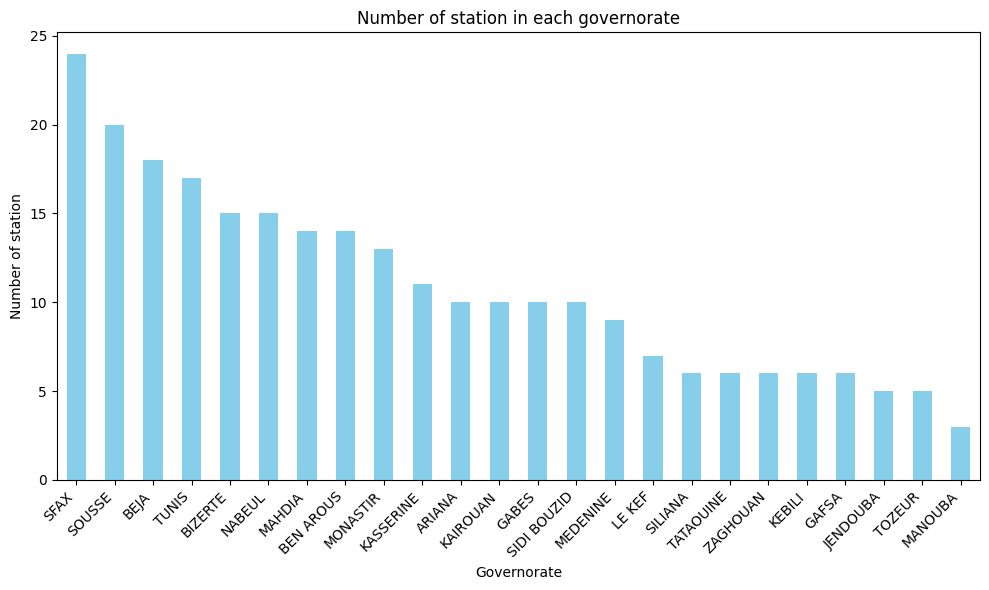

In [12]:
nbr_station=station_service['GOUVERNORAT'].value_counts()
# Tracer le graphique
plt.figure(figsize=(10, 6))
nbr_station.plot(kind='bar', color='skyblue')
plt.title('Number of station in each governorate')
plt.xlabel('Governorate')
plt.ylabel('Number of station')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

In [1]:
# Visualisation par gouvernorat
plt.figure(figsize=(12, 6))
sns.barplot(x='CODGVR', y='SUM(QTEPRD)', data=dataset)
plt.title('Total quantity by governorate')
plt.xlabel('Governorate')
plt.ylabel('Total Quantity')
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

## <i>Interpretation</i>
Zaghouan dominates a vast agricultural plain<br>
Tunis consumes more fuel than other governorate and this reflects : <br>
    -the high density population for tunisia's capital <br>
    -the high economic activity<br>
Monastir represents a tourist destination in tunisia.



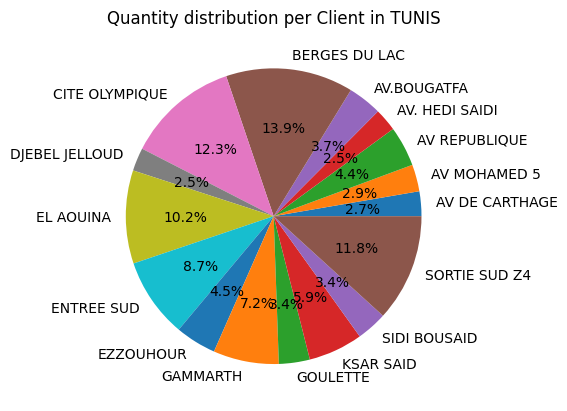

In [14]:
df_tunis = dataset[dataset["CODGVR"] == "TUNIS"]
df_somme_client = df_tunis.groupby(["NUMCPT"])["SUM(QTEPRD)"].sum()
plt.pie(df_somme_client.values, labels=df_somme_client.index, autopct="%1.1f%%")
plt.title("Quantity distribution per Client in TUNIS")
plt.show()

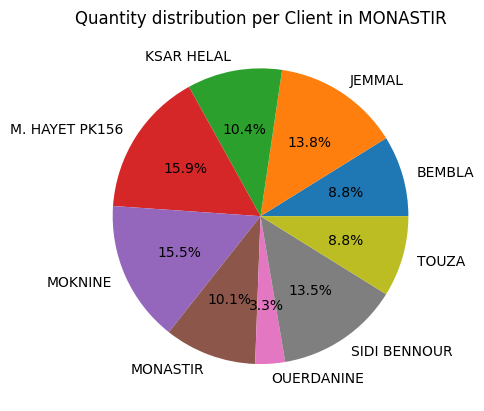

In [15]:
df_monastir = dataset[dataset["CODGVR"] == "MONASTIR"]

df_somme_client = df_monastir.groupby(["NUMCPT"])["SUM(QTEPRD)"].sum()

plt.pie(df_somme_client.values, labels=df_somme_client.index, autopct="%1.1f%%")

plt.title("Quantity distribution per Client in MONASTIR")

plt.show()

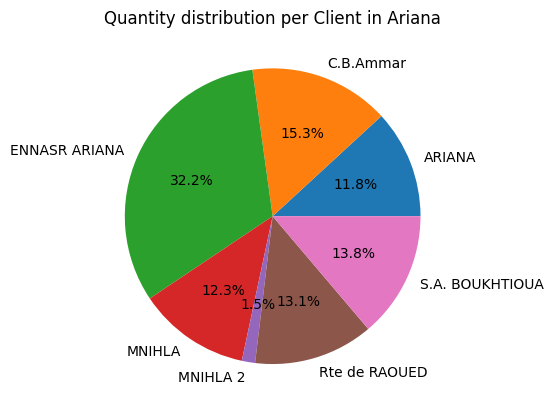

In [16]:
df_ariana = dataset[dataset["CODGVR"] == "ARIANA"]

df_somme_client = df_ariana.groupby(["NUMCPT"])["SUM(QTEPRD)"].sum()

plt.pie(df_somme_client.values, labels=df_somme_client.index, autopct="%1.1f%%")

plt.title("Quantity distribution per Client in Ariana")

plt.show()

In [17]:
# dataset['MOIS'] = pd.to_datetime(dataset['MOIS'], errors='coerce')

# # Vérifiez si la conversion a réussi
# if dataset['MOIS'].isnull().any():
#     print("Certaines valeurs de MOIS n'ont pas pu être converties en datetime.")

# # Extraire le mois et l'année
# dataset['YearMonth'] = dataset['MOIS'].dt.to_period('M')

# # Grouper par mois et année et calculer la somme
# df_somme_mensuelle = dataset.groupby(["YearMonth"])["SUM(QTEPRD)"].sum()

# # Tracer le graphique
# plt.barh(df_somme_mensuelle.index.astype(str), df_somme_mensuelle)
# plt.xlabel("Total quantity delivered")
# plt.ylabel("Month")
# plt.title("Total quantity delivered per month")
# plt.show()

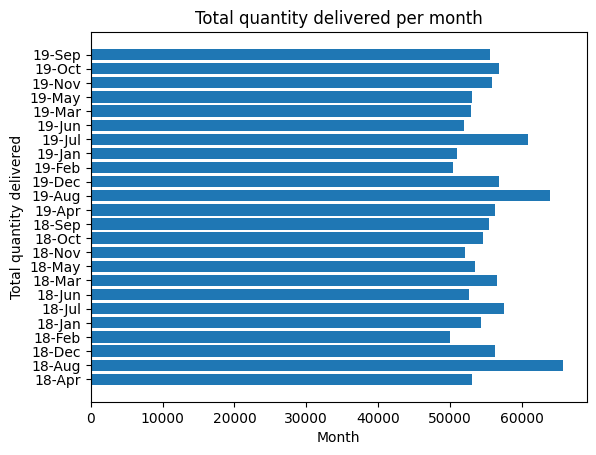

In [17]:
import matplotlib.pyplot as plt

df_somme_mensuelle = dataset.groupby(["MOIS"])["SUM(QTEPRD)"].sum()

plt.barh(df_somme_mensuelle.index, df_somme_mensuelle)
plt.xlabel("Month")
plt.ylabel("Total quantity delivered")
plt.title("Total quantity delivered per month")
plt.show()

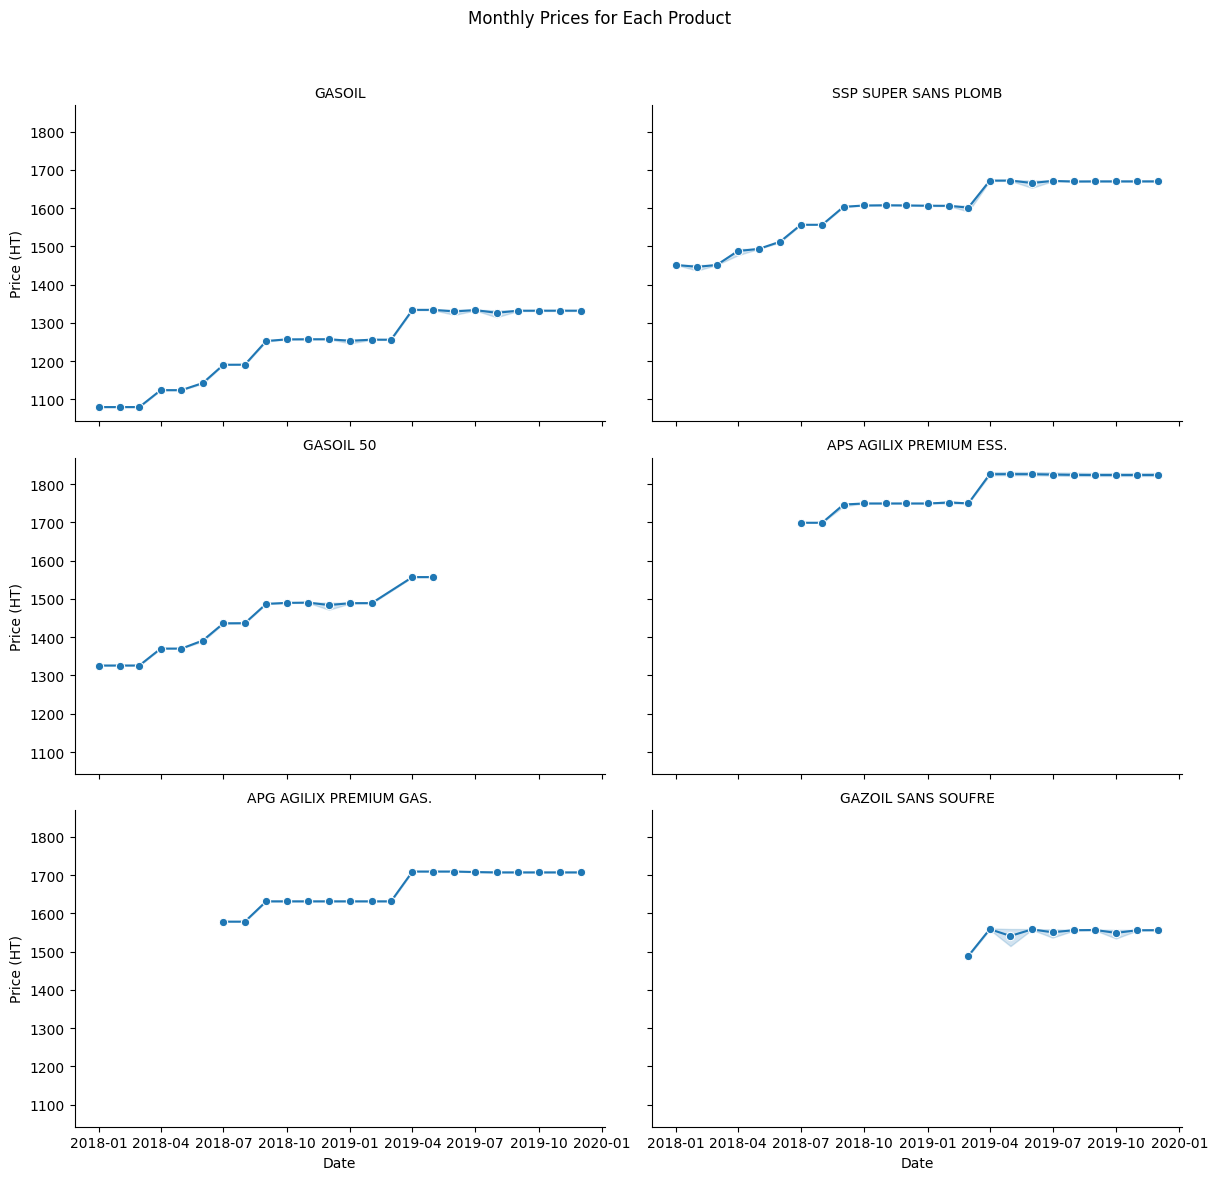

In [19]:
GASOIL

## <i>Interpretation</i>
-There is a notable variation in the quantity of fuel delivered each month and especially for <b>Aug-18 </b>After refering to the 'monthly prices for each product' graph, we can interpret that this spike is  relevant <b>to the increase of fuel price in sept-18</b>
<br>
-There could be times of year when fuel demand increases, perhaps due to holidays or weather changes and this happened especially during summer vacation (July-19,Aug-19,Aug-18)



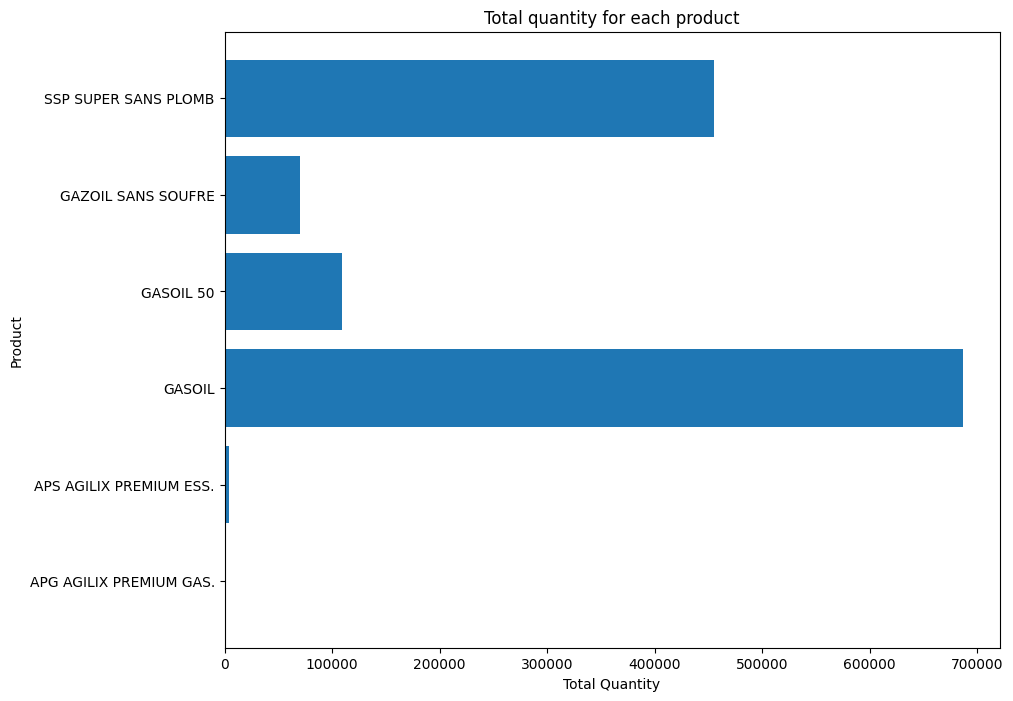

In [20]:
import matplotlib.pyplot as plt

# Calculer la quantité totale de carburant livré pour chaque produit
df_somme_produit = dataset.groupby(["LIBPRD"])["SUM(QTEPRD)"].sum()
# Créer un bar plot pour chaque produit

plt.figure(figsize=(10, 8))
plt.barh(df_somme_produit.index, df_somme_produit)
plt.xlabel('Total Quantity')
plt.ylabel('Product')
plt.title('Total quantity for each product')
plt.show()

# 2-Data Preparation

### 2.1 Outliers

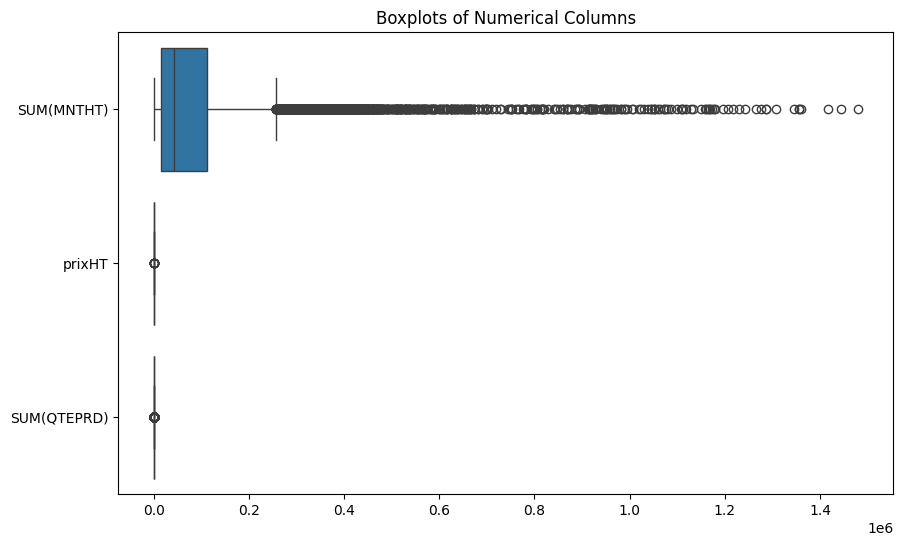

In [21]:
import seaborn as sns


numerical_columns = dataset.select_dtypes(include=['float64']).columns
# Create a boxplot for all numerical columns on the same graph
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.boxplot(data=dataset[numerical_columns], orient='h')
plt.title('Boxplots of Numerical Columns')
plt.show()

### Outliers of PrixHt

In [22]:
def calculate_outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower_bound, upper_bound = calculate_outlier_bounds(dataset['prixHT'])

# Sélectionner les lignes qui contiennent des outliers dans 'prixHT'
outliers = dataset[(dataset['prixHT'] < lower_bound) | (dataset['prixHT'] > upper_bound)]

# Afficher les lignes contenant les outliers
outliers



,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,SUM(QTEPRD)
5552,SKHIRA,SSP SUPER SANS PLOMB,KSOUR ESSEF,2018-02-01,MAHDIA,KSOUR ESSAF,0.0,0.0,0.0
5892,SKHIRA,GASOIL 50,REMADA,2018-12-01,TATAOUINE,REMADA,0.0,0.0,0.0
9327,GERANT POIT DE VENTE,GASOIL,AV. HEDI SAIDI,2019-01-01,TUNIS,TUNIS VILLE,119.4,0.0,0.0
9531,SKHIRA,GAZOIL SANS SOUFRE,BOUJARBOU,2019-10-01,SFAX,BOUJARBOU,0.0,0.0,0.0
9943,SKHIRA,SSP SUPER SANS PLOMB,AV REPUBLIQUE,2018-04-01,TUNIS,TUNIS VILLE,0.0,0.0,0.0
10546,SKHIRA,GAZOIL SANS SOUFRE,S. LAHED .S,2019-05-01,SOUSSE,SOUSSE,0.0,0.0,0.0
10613,BIZERTE CARBURANT,GAZOIL SANS SOUFRE,BIR MCHERGA,2019-05-01,ZAGHOUAN,BIR MCHERGUA,0.0,0.0,0.0
14789,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,TOZOGHRANE,2019-06-01,NABEUL,TOZGRANE,0.0,0.0,0.0
14811,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,BIR MCHERGA,2019-03-01,ZAGHOUAN,BIR MCHERGUA,0.0,0.0,0.0
16137,SKHIRA,GASOIL,JEBENIANA,2019-06-01,SFAX,JBENIANA,0.0,0.0,0.0


In [23]:
lower_bound, upper_bound = calculate_outlier_bounds(dataset['SUM(QTEPRD)'])

# Sélectionner les lignes qui contiennent des outliers dans 'SUM(QTEPRD)'
outliers = dataset[(dataset['SUM(QTEPRD)'] < lower_bound) | (dataset['SUM(QTEPRD)'] > upper_bound)]

# Afficher les lignes contenant les outliers
outliers

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,SUM(QTEPRD)
9,GOULETTE,SSP SUPER SANS PLOMB,EL MOUROUJ,2018-02-01,BEN AROUS,BIR EL KASSAA,320747.024,1451.344,221.0
25,SKHIRA,GASOIL,SOUASSI,2018-01-01,MAHDIA,SOUASSI,233260.776,1079.911,216.0
26,SKHIRA,GASOIL,AGAREB,2018-01-01,SFAX,AGAREB,340171.965,1079.911,315.0
33,SKHIRA,GASOIL,CHERARDA,2018-01-01,KAIROUAN,CHERARDA,272137.572,1079.911,252.0
58,GOULETTE,GASOIL,BEN AROUS MC 34,2018-03-01,BEN AROUS,BEN AROUS,279696.949,1079.911,259.0
...,...,...,...,...,...,...,...,...,...
21712,GOULETTE,SSP SUPER SANS PLOMB,Rte de RAOUED,2019-12-01,ARIANA,ARIANA,408841.055,1668.739,245.0
21725,GOULETTE,GASOIL,BIR MCHERGA,2019-12-01,ZAGHOUAN,BIR MCHERGUA,326088.385,1330.973,245.0
21727,GOULETTE,GASOIL,KONDAR,2019-12-01,SOUSSE,KONDAR,370010.494,1330.973,278.0
21745,GOULETTE,GASOIL,EL MOUROUJ,2019-12-01,BEN AROUS,BIR EL KASSAA,307454.763,1330.973,231.0


In [24]:
lower_bound, upper_bound = calculate_outlier_bounds(dataset['SUM(MNTHT)'])

outliers = dataset[(dataset['SUM(MNTHT)'] < lower_bound) | (dataset['SUM(MNTHT)'] > upper_bound)]

outliers

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,SUM(QTEPRD)
9,GOULETTE,SSP SUPER SANS PLOMB,EL MOUROUJ,2018-02-01,BEN AROUS,BIR EL KASSAA,320747.024,1451.344,221.0
26,SKHIRA,GASOIL,AGAREB,2018-01-01,SFAX,AGAREB,340171.965,1079.911,315.0
33,SKHIRA,GASOIL,CHERARDA,2018-01-01,KAIROUAN,CHERARDA,272137.572,1079.911,252.0
58,GOULETTE,GASOIL,BEN AROUS MC 34,2018-03-01,BEN AROUS,BEN AROUS,279696.949,1079.911,259.0
61,GOULETTE,SSP SUPER SANS PLOMB,BERGES DU LAC,2018-03-01,TUNIS,TUNIS VILLE,1230739.712,1451.344,848.0
...,...,...,...,...,...,...,...,...,...
21712,GOULETTE,SSP SUPER SANS PLOMB,Rte de RAOUED,2019-12-01,ARIANA,ARIANA,408841.055,1668.739,245.0
21725,GOULETTE,GASOIL,BIR MCHERGA,2019-12-01,ZAGHOUAN,BIR MCHERGUA,326088.385,1330.973,245.0
21727,GOULETTE,GASOIL,KONDAR,2019-12-01,SOUSSE,KONDAR,370010.494,1330.973,278.0
21745,GOULETTE,GASOIL,EL MOUROUJ,2019-12-01,BEN AROUS,BIR EL KASSAA,307454.763,1330.973,231.0


Leave only price > 0

In [25]:
dataset=dataset[dataset['prixHT']>0]

### 2.2 Order data

In [26]:
dataset= dataset.sort_values(by="MOIS")


In [27]:
dataset = dataset.sort_values(by=['NUMCPT', 'LIBPRD', 'MOIS'])


### 2.3 Add Lagging

In [28]:
dataset['lag1_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(1)
dataset['lag2_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(2)
dataset['lag3_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(3)
dataset['lag4_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(4)
dataset['lag5_previous_quantity'] = dataset.groupby(['NUMCPT','LIBPRD'])['SUM(QTEPRD)'].shift(5)



In [29]:
dataset['lag1_previous_quantity'].fillna(0, inplace=True)
dataset['lag2_previous_quantity'].fillna(0, inplace=True)
dataset['lag3_previous_quantity'].fillna(0, inplace=True)
dataset['lag4_previous_quantity'].fillna(0, inplace=True)
dataset['lag5_previous_quantity'].fillna(0, inplace=True)



In [30]:
columns = list(dataset.columns)
columns.append(columns.pop(columns.index('SUM(QTEPRD)')))
dataset = dataset[columns]
dataset

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,lag1_previous_quantity,lag2_previous_quantity,lag3_previous_quantity,lag4_previous_quantity,lag5_previous_quantity,SUM(QTEPRD)
26,SKHIRA,GASOIL,AGAREB,2018-01-01,SFAX,AGAREB,340171.965,1079.911,0.0,0.0,0.0,0.0,0.0,315.0
20445,SKHIRA,GASOIL,AGAREB,2018-02-01,SFAX,AGAREB,308854.546,1079.911,315.0,0.0,0.0,0.0,0.0,286.0
20435,SKHIRA,GASOIL,AGAREB,2018-03-01,SFAX,AGAREB,343411.698,1079.911,286.0,315.0,0.0,0.0,0.0,318.0
13854,SKHIRA,GASOIL,AGAREB,2018-04-01,SFAX,AGAREB,342868.495,1124.159,318.0,286.0,315.0,0.0,0.0,305.0
1617,SKHIRA,GASOIL,AGAREB,2018-05-01,SFAX,AGAREB,259680.729,1124.159,305.0,318.0,286.0,315.0,0.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9247,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-09-01,BIZERTE,ZARZOUNA,210261.114,1668.739,152.0,150.0,117.0,120.0,116.0,126.0
2311,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-10-01,BIZERTE,ZARZOUNA,206923.636,1668.739,126.0,152.0,150.0,117.0,120.0,124.0
13587,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-11-01,BIZERTE,ZARZOUNA,200248.680,1668.739,124.0,126.0,152.0,150.0,117.0,120.0
2702,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-12-01,BIZERTE,ZARZOUNA,201917.419,1668.739,120.0,124.0,126.0,152.0,150.0,121.0


In [32]:
dataset.to_csv('../../data/BO1_forcast_customer_demand/shifted.csv')

### 2.4 Data transformation 

In [31]:
data_transformed=pd.read_csv('../../data/BO1_forcast_customer_demand/shifted.csv' )


In [32]:
data_transformed.drop(columns=['Unnamed: 0'], inplace=True)

data_original=data_transformed


In [34]:
data_original

,NOMDPO,LIBPRD,NUMCPT,MOIS,CODGVR,CODLOC,SUM(MNTHT),prixHT,lag1_previous_quantity,lag2_previous_quantity,lag3_previous_quantity,lag4_previous_quantity,lag5_previous_quantity,SUM(QTEPRD)
0,SKHIRA,GASOIL,AGAREB,2018-01-01,SFAX,AGAREB,340171.965,1079.911,0.0,0.0,0.0,0.0,0.0,315.0
1,SKHIRA,GASOIL,AGAREB,2018-02-01,SFAX,AGAREB,308854.546,1079.911,315.0,0.0,0.0,0.0,0.0,286.0
2,SKHIRA,GASOIL,AGAREB,2018-03-01,SFAX,AGAREB,343411.698,1079.911,286.0,315.0,0.0,0.0,0.0,318.0
3,SKHIRA,GASOIL,AGAREB,2018-04-01,SFAX,AGAREB,342868.495,1124.159,318.0,286.0,315.0,0.0,0.0,305.0
4,SKHIRA,GASOIL,AGAREB,2018-05-01,SFAX,AGAREB,259680.729,1124.159,305.0,318.0,286.0,315.0,0.0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21729,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-09-01,BIZERTE,ZARZOUNA,210261.114,1668.739,152.0,150.0,117.0,120.0,116.0,126.0
21730,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-10-01,BIZERTE,ZARZOUNA,206923.636,1668.739,126.0,152.0,150.0,117.0,120.0,124.0
21731,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-11-01,BIZERTE,ZARZOUNA,200248.680,1668.739,124.0,126.0,152.0,150.0,117.0,120.0
21732,BIZERTE CARBURANT,SSP SUPER SANS PLOMB,ZARZOUNA,2019-12-01,BIZERTE,ZARZOUNA,201917.419,1668.739,120.0,124.0,126.0,152.0,150.0,121.0


encodage des donnes categoricals (binaire :true or false)

In [221]:
categorical_columns = ['NOMDPO', 'LIBPRD', 'NUMCPT','CODGVR','CODLOC']

# Appliquer l'encodage one-hot
data_transformed = pd.get_dummies(data_transformed, columns=categorical_columns)

In [220]:
data_transformed['MOIS'] = pd.to_datetime(data_transformed['MOIS'])
data_transformed['Year'] = data_transformed['MOIS'].dt.year
data_transformed['Month'] = data_transformed['MOIS'].dt.month
data_transformed['Day'] = data_transformed['MOIS'].dt.day
data_transformed['Weekday'] = data_transformed['MOIS'].dt.weekday
data_transformed['Quarter'] = data_transformed['MOIS'].dt.quarter
data_transformed['month_sin'] = np.sin(2 * np.pi * data_transformed['Month'] / 12)
data_transformed['month_cos'] = np.cos(2 * np.pi * data_transformed['Month'] / 12)
data_transformed['day_sin'] = np.sin(2 * np.pi * data_transformed['Day'] / 31)
data_transformed['day_cos'] = np.cos(2 * np.pi * data_transformed['Day'] / 31)
# Supprimer la colonne MOIS
data_transformed.drop(columns=['MOIS'], inplace=True)

### 2.5 Feature Scaling

data transf : numerique 0-1

In [40]:
 
data_transformed[data_transformed.select_dtypes(include='bool').columns] = data_transformed.select_dtypes(include='bool').astype(int)


normalisation :tous les colonnes sonr dans le meme echelle


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original DataFrame without non-numeric columns
numeric_data = data_transformed.select_dtypes(include=['number'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numeric columns
dataset_normalized = scaler.fit_transform(numeric_data)

# Convert the normalized array back to a DataFrame
dataset_normalized = pd.DataFrame(dataset_normalized, columns=numeric_data.columns)

In [42]:
columns = list(dataset_normalized.columns)
columns.append(columns.pop(columns.index('SUM(QTEPRD)')))
dataset_normalized = dataset_normalized[columns]
dataset_normalized

,SUM(MNTHT),prixHT,lag1_previous_quantity,lag2_previous_quantity,lag3_previous_quantity,lag4_previous_quantity,lag5_previous_quantity,NOMDPO_BIZERTE CARBURANT,NOMDPO_GOULETTE,NOMDPO_SKHIRA,...,Year,Month,Day,Weekday,Quarter,month_sin,month_cos,day_sin,day_cos,SUM(QTEPRD)
0,0.228694,0.002421,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.750000,0.933013,0.0,0.0,0.353273
1,0.207505,0.002421,0.354730,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.090909,0.0,0.500000,0.000000,0.933013,0.750000,0.0,0.0,0.320542
2,0.230886,0.002421,0.322072,0.354730,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.181818,0.0,0.500000,0.000000,1.000000,0.500000,0.0,0.0,0.356659
3,0.230518,0.055990,0.358108,0.322072,0.354730,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.272727,0.0,1.000000,0.333333,0.933013,0.250000,0.0,0.0,0.341986
4,0.174235,0.055990,0.343468,0.358108,0.322072,0.354730,0.000000,0.0,0.0,1.0,...,0.0,0.363636,0.0,0.166667,0.333333,0.750000,0.066987,0.0,0.0,0.258465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21729,0.140798,0.715287,0.171171,0.168919,0.131757,0.135135,0.130631,1.0,0.0,0.0,...,1.0,0.727273,0.0,1.000000,0.666667,0.000000,0.500000,0.0,0.0,0.139955
21730,0.138540,0.715287,0.141892,0.171171,0.168919,0.131757,0.135135,1.0,0.0,0.0,...,1.0,0.818182,0.0,0.166667,1.000000,0.066987,0.750000,0.0,0.0,0.137698
21731,0.134024,0.715287,0.139640,0.141892,0.171171,0.168919,0.131757,1.0,0.0,0.0,...,1.0,0.909091,0.0,0.666667,1.000000,0.250000,0.933013,0.0,0.0,0.133183
21732,0.135153,0.715287,0.135135,0.139640,0.141892,0.171171,0.168919,1.0,0.0,0.0,...,1.0,1.000000,0.0,1.000000,1.000000,0.500000,1.000000,0.0,0.0,0.134312


Remarque :add pca  and features importance to the target and optimize the lag features 

### 2.6 drop high correlation feature with the target

In [217]:
dataset_normalized_shuffled.drop('SUM(MNTHT)',inplace=True,axis=1)

# 3- Modeling



### 3.1 XGboost      

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.utils import shuffle


#### 3.1.1 Shuffle Data

In [51]:
dataset_normalized_shuffled = shuffle(dataset_normalized, random_state=42)
data_original_shuffled = shuffle(data_original, random_state=42)

#### 3.1.2 Split data

In [163]:

x = dataset_normalized_shuffled.drop(columns=['SUM(QTEPRD)'])
y = dataset_normalized_shuffled['SUM(QTEPRD)']
X_original = data_original_shuffled.drop(columns=['SUM(QTEPRD)'])
Y_original = data_original_shuffled['SUM(QTEPRD)']


In [164]:
x.columns

Index(['prixHT', 'lag1_previous_quantity', 'lag2_previous_quantity',
       'lag3_previous_quantity', 'lag4_previous_quantity',
       'lag5_previous_quantity', 'NOMDPO_BIZERTE CARBURANT', 'NOMDPO_GOULETTE',
       'NOMDPO_SKHIRA', 'NOMDPO_ZARZIS',
       ...
       'CODLOC_ZARZOUNA', 'Year', 'Month', 'Day', 'Weekday', 'Quarter',
       'month_sin', 'month_cos', 'day_sin', 'day_cos'],
      dtype='object', length=444)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, Y_original, test_size=0.2, random_state=42)


#### 3.1.3 Train the model

In [166]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

#### 3.1.4 Predict the train set

In [149]:
y_pred_train= model.predict(X_train)
y_pred_train = pd.Series(y_pred_train, name='SUM(QTEPRD)')
y_pred_train.index = X_train.index


14827    0.030368
13253    0.002294
1691     0.004595
5903     0.002221
8334     0.113847
           ...   
986      0.010104
20797    0.030458
7944     0.211562
3702     0.024942
723      0.152916
Name: SUM(QTEPRD), Length: 17387, dtype: float32

In [169]:
df_target=pd.concat([y_train,y_pred_train],axis=1)
df_target.columns=['y_train','y_pred_train']
df_target

,y_train,y_pred_train
14827,0.030474,0.030368
13253,0.002257,0.002294
1691,0.004515,0.004595
5903,0.002257,0.002221
8334,0.113995,0.113847
...,...,...
986,0.010158,0.010104
20797,0.030474,0.030458
7944,0.213318,0.211562
3702,0.024831,0.024942


In [170]:
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.0004140601411472265


In [179]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_model_train=r2_score(y_train, y_pred_train)
r2_model_train

0.9999807770876838

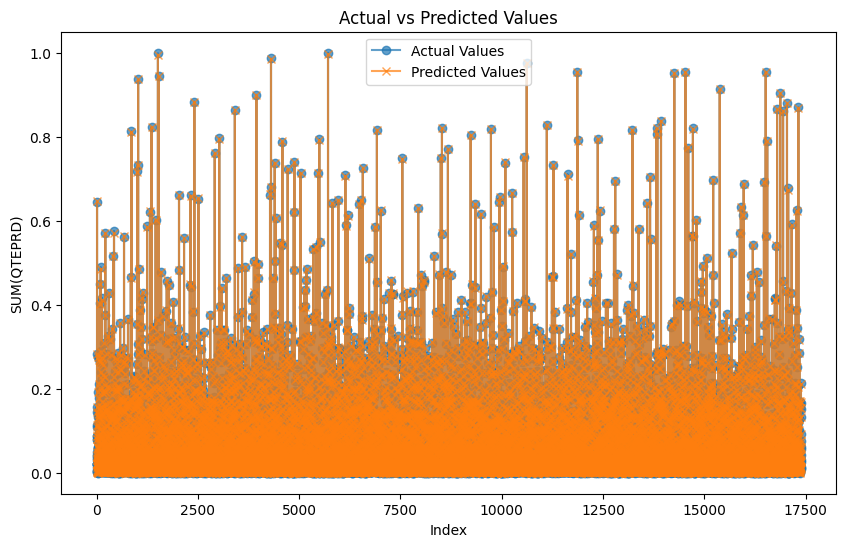

In [216]:


plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_train.values, label='Actual Values', alpha=0.7, linestyle='-', marker='o')

# Plot predicted values
plt.plot(y_pred_train.values, label='Predicted Values', alpha=0.7, linestyle='-', marker='x')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('SUM(QTEPRD)')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

#### 3.1.5 Predict the test set

In [167]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred, name='SUM(QTEPRD)')
y_pred.index = X_test.index


21656    0.042223
6187     0.098664
9131     0.032848
11142    0.198801
18516    0.039206
           ...   
7521     0.114687
14088    0.032103
11452    0.184908
1365     0.008502
6534    -0.002567
Name: SUM(QTEPRD), Length: 4347, dtype: float32

In [175]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.03970274552894041


In [178]:
r2_model_test = r2_score(y_test, y_pred)
r2_model_test

0.8142760619655247

In [177]:
df_target=pd.concat([y_test,y_pred],axis=1)
df_target.columns=['y_test','y_pred_test']
df_target

,y_test,y_pred_test
21656,0.001129,0.042223
6187,0.106095,0.098664
9131,0.044018,0.032848
11142,0.363431,0.198801
18516,0.032731,0.039206
...,...,...
7521,0.111738,0.114687
14088,0.039503,0.032103
11452,0.135440,0.184908
1365,0.001129,0.008502


### 3.1.6 XGboost with best params

In [181]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 1000}


In [182]:
best_model = XGBRegressor(objective ='reg:squarederror', 
                              n_estimators=best_params['n_estimators'], 
                              learning_rate=best_params['learning_rate'], 
                              max_depth=best_params['max_depth'], 
                              min_child_weight=best_params['min_child_weight'])

best_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##### predict train set with best params

In [183]:
y_pred_train_best = best_model.predict(X_train)
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
print(f"Mean Squared Error with best parameters: {mse_train_best}")

Mean Squared Error with best parameters: 0.00014314806070481897


#### predict test set with best params

In [184]:
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error with best parameters: {mse_best}")

Mean Squared Error with best parameters: 0.001431100813637148


In [186]:
r2_model_test_best = r2_score(y_test, y_pred_best)
r2_model_test_best

0.8313846796403631

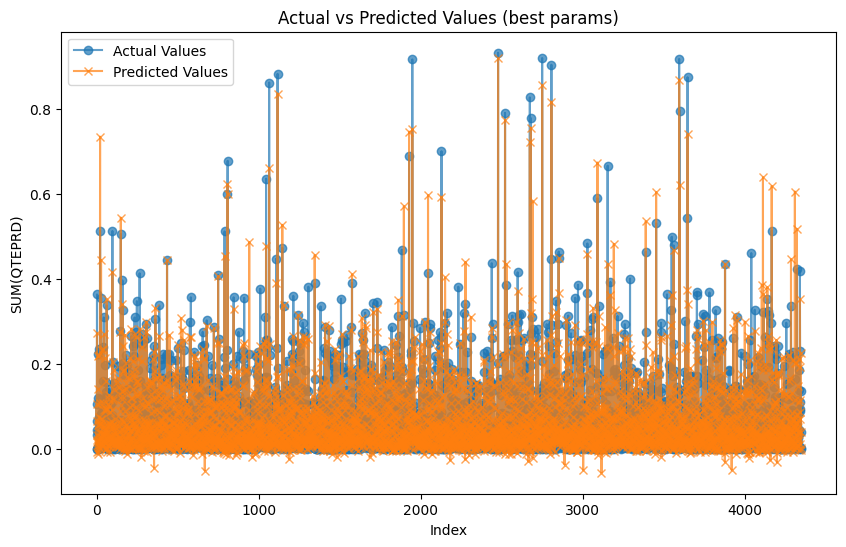

In [187]:
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values, label='Actual Values', alpha=0.7, linestyle='-', marker='o')

# Plot predicted values
plt.plot(y_pred_best, label='Predicted Values', alpha=0.7, linestyle='-', marker='x')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('SUM(QTEPRD)')
plt.title('Actual vs Predicted Values (best params)')
plt.legend()

# Show the plot
plt.show()

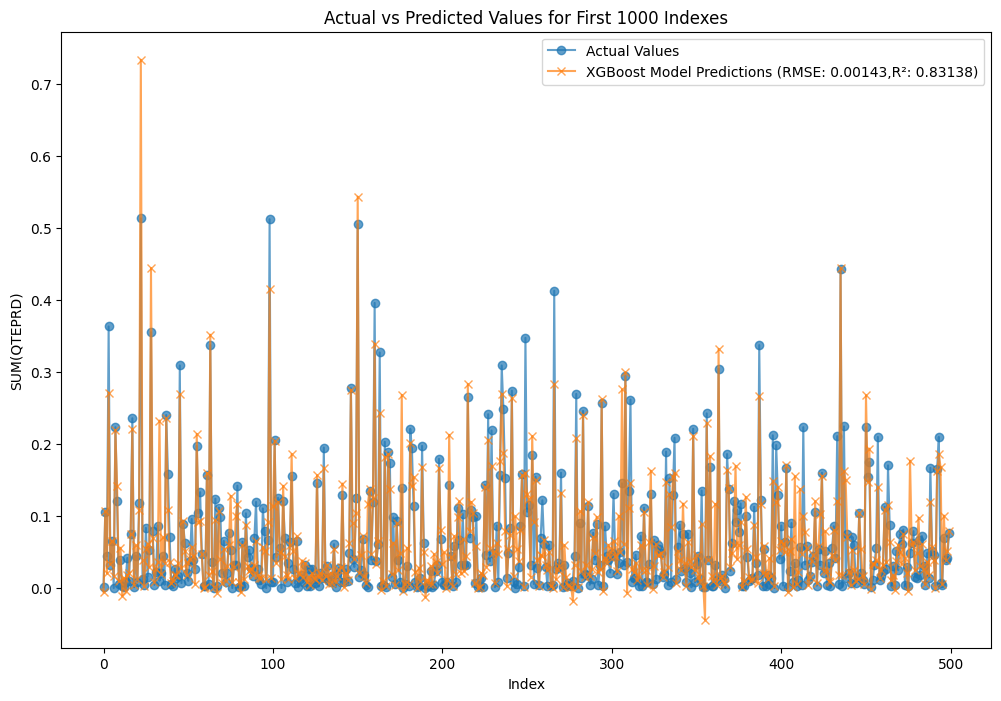

In [190]:
n = 500
y_test_1000 = y_test[:n]
y_pred_1000 = y_pred_best[:n]
y_pred_lgbm_1000 = y_pred_lgbm[:n]

# Tracé des valeurs réelles et prédites pour les 1000 premiers index
plt.figure(figsize=(12, 8))

plt.plot(y_test_1000.values, label='Actual Values', alpha=0.7, linestyle='-', marker='o')
plt.plot(y_pred_1000, label=f'XGBoost Model Predictions (RMSE: {mse_best:.5f},R²: {r2_model_test_best:.5f})', alpha=0.7, linestyle='-', marker='x')

plt.xlabel('Index')
plt.ylabel('SUM(QTEPRD)')
plt.title('Actual vs Predicted Values for First 1000 Indexes')
plt.legend()

# Afficher le graphique
plt.show()
     

### plot with time 

In [194]:

y_pred_best = pd.Series(y_pred_best, name='SUM(QTEPRD)')
y_pred_best.index = X_test.index


In [195]:
df_pred = pd.concat([X_test_original, y_pred_best],axis=1)
df_test=pd.concat([X_test_original, y_test],axis=1)
df_pred['NUMCPT'].value_counts()

NUMCPT
M. HAYET PK156      43
S. KHELIFA pk72     42
HERGLA              39
S. LAHED .S         38
TOUZA               37
                    ..
MNIHLA 2             3
FERIANA              3
KERKER               3
TATAOUINE 2          2
OUESLATIA            1
Name: count, Length: 212, dtype: int64

In [224]:
import plotly.express as px
import plotly.graph_objects as go



df_filtered = df_pred[df_pred['NUMCPT'] == 'TOUZA']
x_hergla=df_filtered.drop(columns=['SUM(QTEPRD)'])
y_pred_hergla=df_filtered['SUM(QTEPRD)']

df_test_filtered=df_test[df_test['NUMCPT'] == 'TOUZA']
y_test_hergla=df_test_filtered['SUM(QTEPRD)']
fig = px.line()
fig = go.Figure(fig)
x_hergla = x_hergla.sort_values(by="MOIS")


fig.add_trace(go.Scatter(x=x_hergla['MOIS'], y=y_pred_hergla, 
                         mode='lines', name='prediction of hergla station', line=dict(color='red')))
fig.add_trace(go.Scatter(x=x_hergla['MOIS'], y=y_test_hergla, 
                         mode='lines', name='test of hergla station', line=dict(color='blue')))
fig.show()

In [63]:
mae_model2 = mean_absolute_error(y_test, y_pred_best)
r2_model2 = r2_score(y_test, y_pred_best)

### 3.2 LightGBM


In [64]:
from lightgbm import LGBMRegressor

In [65]:
model_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=42)
model_lgbm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lgbm = model_lgbm.predict(X_test)

# Evaluate the model
rmse_lgbm = mean_squared_error(y_test, y_pred_lgbm, squared=False)
print(f"RMSE: {rmse_lgbm}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2653
[LightGBM] [Info] Number of data points in the train set: 17387, number of used features: 428
[LightGBM] [Info] Start training from score 0.066878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [66]:
mae_model3 = mean_absolute_error(y_test, y_pred_lgbm)
r2_model3 = r2_score(y_test, y_pred_lgbm)

### 3.3 Models Evaluation 

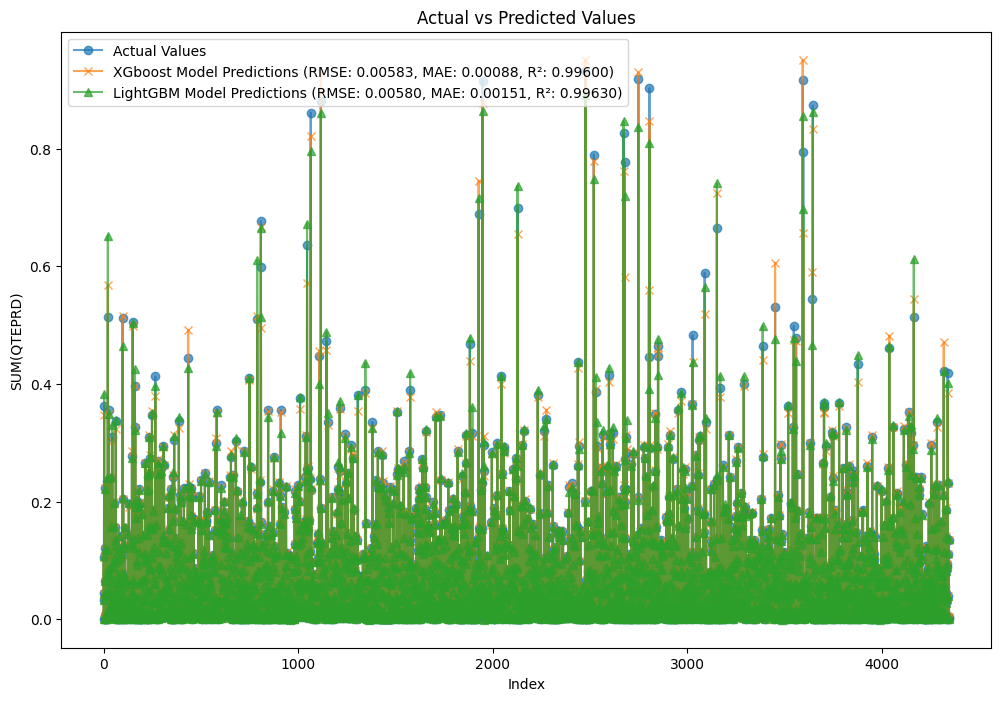

In [67]:
# Tracé des valeurs réelles et prédites
plt.figure(figsize=(12, 8))

plt.plot(y_test.values, label='Actual Values', alpha=0.7, linestyle='-', marker='o')
plt.plot(y_pred, label=f'XGboost Model Predictions (RMSE: {rmse:.5f}, MAE: {mae_model1:.5f}, R²: {r2_model1:.5f})', alpha=0.7, linestyle='-', marker='x')
plt.plot(y_pred_lgbm, label=f'LightGBM Model Predictions (RMSE: {rmse_lgbm:.5f}, MAE: {mae_model2:.5f}, R²: {r2_model2:.5f})', alpha=0.7, linestyle='-', marker='^')

plt.xlabel('Index')
plt.ylabel('SUM(QTEPRD)')
plt.title('Actual vs Predicted Values')
plt.legend()

# Afficher le graphique
plt.show()

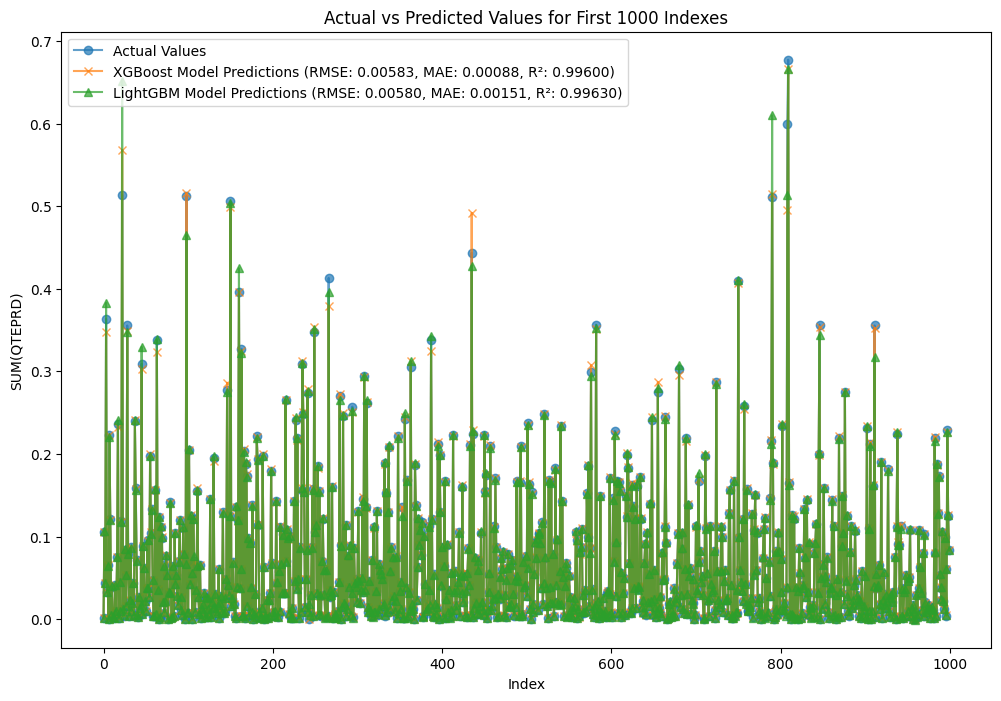

In [68]:
# Sélection des 1000 premiers index
n = 1000
y_test_1000 = y_test[:n]
y_pred_1000 = y_pred[:n]
y_pred_lgbm_1000 = y_pred_lgbm[:n]

# Tracé des valeurs réelles et prédites pour les 1000 premiers index
plt.figure(figsize=(12, 8))

plt.plot(y_test_1000.values, label='Actual Values', alpha=0.7, linestyle='-', marker='o')
plt.plot(y_pred_1000, label=f'XGBoost Model Predictions (RMSE: {rmse:.5f}, MAE: {mae_model1:.5f}, R²: {r2_model1:.5f})', alpha=0.7, linestyle='-', marker='x')
plt.plot(y_pred_lgbm_1000, label=f'LightGBM Model Predictions (RMSE: {rmse_lgbm:.5f}, MAE: {mae_model2:.5f}, R²: {r2_model2:.5f})', alpha=0.7, linestyle='-', marker='^')

plt.xlabel('Index')
plt.ylabel('SUM(QTEPRD)')
plt.title('Actual vs Predicted Values for First 1000 Indexes')
plt.legend()

# Afficher le graphique
plt.show()

In [116]:
df_pred = pd.concat([X_test_original, y_pred],axis=1)
df_test=pd.concat([X_test_original, y_test],axis=1)
df_pred['NUMCPT'].value_counts()

NUMCPT
M. HAYET PK156      43
S. KHELIFA pk72     42
HERGLA              39
S. LAHED .S         38
TOUZA               37
                    ..
MNIHLA 2             3
FERIANA              3
KERKER               3
TATAOUINE 2          2
OUESLATIA            1
Name: count, Length: 212, dtype: int64

In [174]:
import plotly.express as px
import plotly.graph_objects as go



df_filtered = df_pred[df_pred['NUMCPT'] == 'HERGLA']
x_hergla=df_filtered.drop(columns=['SUM(QTEPRD)'])
y_pred_hergla=df_filtered['SUM(QTEPRD)']

df_test_filtered=df_test[df_test['NUMCPT'] == 'HERGLA']
y_test_hergla=df_test_filtered['SUM(QTEPRD)']
fig = px.line()
fig = go.Figure(fig)
x_hergla = x_hergla.sort_values(by="MOIS")


fig.add_trace(go.Scatter(x=x_hergla['MOIS'], y=y_pred_hergla, 
                         mode='lines', name='prediction of hergla station', line=dict(color='red')))
fig.add_trace(go.Scatter(x=x_hergla['MOIS'], y=y_test_hergla, 
                         mode='lines', name='test of hergla station', line=dict(color='blue')))
fig.show()

In [115]:
y_pred_hergla.describe()

count    43.000000
mean      0.080490
std       0.070773
min       0.003331
25%       0.011855
50%       0.071050
75%       0.140146
max       0.232237
Name: SUM(QTEPRD), dtype: float64

In [114]:
y_test_hergla

13047    0.140596
12878    0.011209
12891    0.187555
13045    0.121065
12951    0.017685
12862    0.003331
12929    0.184295
12883    0.008871
12871    0.008091
12927    0.158378
13009    0.090089
12963    0.048676
12875    0.007850
12902    0.012412
12966    0.039273
12923    0.004698
12936    0.185499
12882    0.004578
13044    0.140899
12897    0.214078
12973    0.095361
12987    0.005643
12958    0.072476
12998    0.139696
13017    0.104261
13015    0.031460
12931    0.004604
13003    0.126377
12859    0.011299
12990    0.046216
12920    0.055212
12984    0.096550
12919    0.155374
13006    0.005620
12989    0.033945
13012    0.170411
12970    0.092372
12938    0.012553
13007    0.091779
13018    0.016923
13022    0.071050
12935    0.200512
12933    0.232237
Name: SUM(QTEPRD), dtype: float32

In [69]:
y_test.iloc[0]

0.0011286681715575622

In [73]:
X_test_original.iloc[0]

NOMDPO                      GOULETTE
LIBPRD                        GASOIL
NUMCPT                      ZARZOUNA
MOIS                      2018-05-01
CODGVR                       BIZERTE
CODLOC                      ZARZOUNA
SUM(MNTHT)                  3372.477
prixHT                      1124.159
lag1_previous_quantity          97.0
lag2_previous_quantity          98.0
lag3_previous_quantity          89.0
lag4_previous_quantity         104.0
lag5_previous_quantity           0.0
Name: 21656, dtype: object

In [70]:
y_pred_lgbm[0]

0.0010204665516507754

In [71]:
X_test.iloc[0]

SUM(MNTHT)                0.000820
prixHT                    0.055990
lag1_previous_quantity    0.109234
lag2_previous_quantity    0.110360
lag3_previous_quantity    0.100225
                            ...   
Quarter                   0.333333
month_sin                 0.750000
month_cos                 0.066987
day_sin                   0.000000
day_cos                   0.000000
Name: 21656, Length: 445, dtype: float64

In [137]:
df =pd.DataFrame({
    'Client':['Ali','Ahmed','Ali','Ali','Ahmed','Ahmed','Ahmed'],
    'Date':['2020-01-15','2020-02-09','2020-01-17','2020-01-25','2020-02-28','2020-01-15','2020-01-15'],
    'Sales':[30,40,10,15,10,5,10]
})
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.strftime('%b')
df

,Client,Date,Sales,Month
0,Ali,2020-01-15,30,Jan
1,Ahmed,2020-02-09,40,Feb
2,Ali,2020-01-17,10,Jan
3,Ali,2020-01-25,15,Jan
4,Ahmed,2020-02-28,10,Feb
5,Ahmed,2020-01-15,5,Jan
6,Ahmed,2020-01-15,10,Jan


In [141]:
df.groupby(['Client','Month'],as_index=False).sum('Sales')

,Client,Month,Sales
0,Ahmed,Feb,50
1,Ahmed,Jan,15
2,Ali,Jan,55
